Below is the plan for the analysis:
1. Understand the data
2. Understand Business objective:
  - Derive high-value customers
  - Tag potential churners
3. Handling Missing values
  - Imputing missing values >70%
  - Imputing missing values <10%
  - convert columns to compatible data types
4. Visualize data
  - Plot the data and understand pattern
5. Featuer engineering
  - Identifying important columns
6. Modelling
7. Evaluating model performance

In [0]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 99999)

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
dict=pd.read_excel('/content/drive/My Drive/Telcom_churn_casestudy/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')
# dict=pd.read_excel('/content/drive/My Drive/InputFiles/Telecom_Churn_Case_Study_Jan2020/Data+Dictionary-+Telecom+Churn+Case+Study.xlsx')


In [0]:
for indici in dict.index:
  print("{}\t\t==> {}".format(dict.loc[indici, 'Acronyms    '], dict.loc[indici, 'Descriptions']) )

MOBILE_NUMBER		==> Customer phone number
CIRCLE_ID		==> Telecom circle area to which the customer belongs to
LOC		==> Local calls - within same telecom circle
STD		==> STD calls - outside the calling circle
IC		==> Incoming calls
OG		==> Outgoing calls
T2T		==> Operator T to T, i.e. within same operator (mobile to mobile)
T2M    		==> Operator T to other operator mobile
T2O    		==> Operator T to other operator fixed line
T2F    		==> Operator T to fixed lines of T
T2C    		==> Operator T to it’s own call center
ARPU    		==> Average revenue per user
MOU    		==> Minutes of usage - voice calls
AON    		==> Age on network - number of days the customer is using the operator T network
ONNET   		==> All kind of calls within the same operator network
OFFNET    		==> All kind of calls outside the operator T network
ROAM		==> Indicates that customer is in roaming zone during the call
SPL   		==> Special calls
ISD    		==> ISD calls
RECH    		==> Recharge
NUM    		==> Number
AMT    		==> Amoun

## 1. Understanding Data

In [0]:
# loading/Reading  the data from csv file
master_df= pd.read_csv('/content/drive/My Drive/Telcom_churn_casestudy/telecom_churn_data.csv')
# master_df= pd.read_csv('/content/drive/My Drive/InputFiles/Telecom_Churn_Case_Study_Jan2020/telecom_churn_data.csv')



In [0]:
# Preserving the master copy by making a working copy datqa frame
working_df=master_df.copy()

In [0]:
# looking working dataframe
working_df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [0]:
#shape of the dataframe
working_df.shape

(99999, 226)

In [0]:
#looking data metrix and outliers
working_df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [0]:
#Checking the unique values of all the variables in the dataset
working_df.nunique().head()

mobile_number     99999
circle_id             1
loc_og_t2o_mou        1
std_og_t2o_mou        1
loc_ic_t2o_mou        1
dtype: int64

In [0]:
#Create a dataframe:
#Checking unique values in each column as if the data is identical it will be no use for our analysis 
uniq_var=pd.DataFrame(working_df.nunique())
uniq_var= uniq_var.reset_index()
uniq_var= uniq_var.rename(columns={'index':'Variable',0:'Value'})
uniq_var.head()

,Variable,Value
0,mobile_number,99999
1,circle_id,1
2,loc_og_t2o_mou,1
3,std_og_t2o_mou,1
4,loc_ic_t2o_mou,1


In [0]:
uniq_var.sort_values(by = 'Value', ascending = False)

,Variable,Value
0,mobile_number,99999
9,arpu_6,85681
10,arpu_7,85308
11,arpu_8,83615
12,arpu_9,79937
82,total_og_mou_7,40477
81,total_og_mou_6,40327
83,total_og_mou_8,40074
84,total_og_mou_9,39160
121,total_ic_mou_6,32247


In [0]:
#Isolating the columns names from others to remove from the dataset
u_col=[j for i,j in zip(uniq_var['Value'],uniq_var['Variable']) if (i==1)]
len(u_col)

16

In [0]:
#Dropping the columns which have only 1 unique value
working_df=working_df.drop(u_col, axis=1)

In [0]:
# Looking at above analysis, mobile number is unique for each customer
# Which doesn't contribute to the modeling, so deleting
working_df = working_df.drop('mobile_number', axis = 1)

In [0]:
#Checking columns count after dropping
working_df.shape

(99999, 209)

## 2. Understanding Business objective:
We do not have a target column in the dataset as we have to derive one using the business knowledge. Therefor, below new featurs are crucial for our further analysis
  1. Derive new features to identify high-value customers
  2. Tag potential curners - New churn column

1. Identify High-value customers:
To identify HV customers we need to get the average usage of each customers
  - Avg usage= no of recharges either data or calls IN|OG
  - Logic for getting the high-value customers
    - All rechrge amt data= total no of rechrages in data * Avg recharge amount for data (this gives all rechregs for data with avg amount) for 6th & 7 month
    - All rech amnt= total rech amnt(for calls ) + all rechr amt data(data) - this gives the avg rech amount of data and calls for 6th & 7 month
    - Average amnt for 6&7= mean of avg recharge amnt of 6 and avg rechrge amnt 7


In [0]:
# Logic for getting the high-value customers
working_df['All_rech_for_data_6']= working_df['total_rech_data_6']*working_df['av_rech_amt_data_6']
working_df['All_rech_amnt_6']= working_df[['total_rech_amt_6','All_rech_for_data_6']].sum(axis=1)

working_df['All_rech_for_data_7']= working_df['total_rech_data_7']*working_df['av_rech_amt_data_7']
working_df['All_rech_amnt_7']= working_df[['total_rech_amt_7','All_rech_for_data_7']].sum(axis=1)

working_df['Avg_rech_amnt_6_7']=(working_df[['All_rech_amnt_6','All_rech_amnt_7']]).mean(axis=1)
working_df['Avg_rech_amnt_6_7'].head()

0    559.0
1    306.0
2    241.5
3    270.0
4    301.0
Name: Avg_rech_amnt_6_7, dtype: float64

In [0]:
#Create a new dataframe for High-value customers
high_val_df=working_df[(working_df['Avg_rech_amnt_6_7']>working_df['Avg_rech_amnt_6_7'].quantile(0.7))]
high_val_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Columns: 214 entries, arpu_6 to Avg_rech_amnt_6_7
dtypes: float64(173), int64(33), object(8)
memory usage: 49.1+ MB


As mentioned in the problem description we have got the same number 29.9K entries in our dataset for high value customers

## 2. Tag 'Churned' customers
Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase are churned customers
- Below attributes are used to tag churners are:
  - total_ic_mou_9
  - total_og_mou_9
  - vol_2g_mb_9
  - vol_3g_mb_9


In [0]:
# checking the high-value dataframe column
high_val_df.head()

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,All_rech_for_data_6,All_rech_amnt_6,All_rech_for_data_7,All_rech_amnt_7,Avg_rech_amnt_6_7
0,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,4,3,2,6,362,252,252,0,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,9/28/2014,252,252,252,0,6/21/2014,7/16/2014,8/8/2014,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,0.0,0.0,0.0,NaN,1.0,1.0,1.0,NaN,252.0,252.0,252.0,NaN,30.13,1.32,5.75,0.00,83.57,150.76,109.61,0.00,212.17,212.17,212.17,NaN,212.17,212.17,

In [0]:
#function to use for churn decision of imp 9 mnth columns
def decide_churn(total_ic, total_og, twoG_usage, threeG_usage):
  if total_ic == 0 and total_og  == 0 and twoG_usage == 0 and threeG_usage == 0:
    return 1
  else:
    return 0

In [0]:
#Creating the churn tag
high_val_df['Churn_tag'] = high_val_df.apply(lambda row: decide_churn(row['total_ic_mou_9'], row['total_og_mou_9'], row['vol_2g_mb_9'], row['vol_3g_mb_9']), axis = 1)

In [0]:
#checking the no of curners 1/0
high_val_df['Churn_tag'].value_counts()

0    27520
1     2433
Name: Churn_tag, dtype: int64

In [0]:
#Checking the no of Churners percentage
(high_val_df['Churn_tag'].value_counts()/high_val_df.shape[0])*100

0    91.877274
1     8.122726
Name: Churn_tag, dtype: float64

From the above churn percentage we can say that only 8% of the total high value customers are churned

In [0]:
# Drop all the columns related to 9th month
for i in high_val_df.columns:
  if '9' in i:
    high_val_df= high_val_df.drop(i,axis=1) 

In [0]:
high_val_df.columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'onnet_mou_6', 'onnet_mou_7',
       'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8',
       'roam_ic_mou_6',
       ...
       'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g',
       'All_rech_for_data_6', 'All_rech_amnt_6', 'All_rech_for_data_7',
       'All_rech_amnt_7', 'Avg_rech_amnt_6_7', 'Churn_tag'],
      dtype='object', length=164)

## 3. Handling Missing values
  - Imputing missing values >40%
  - Imputing missing values <10%

In [0]:
# Derived columns also got added to the working dataframe
high_val_df.shape

(29953, 164)

#### Handling Datetime Columns

In [0]:
high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,6/21/2014,7/16/2014,8/8/2014,6/21/2014,7/16/2014,8/8/2014
7,6/27/2014,7/25/2014,8/26/2014,NaN,NaN,NaN
8,6/25/2014,7/31/2014,8/30/2014,NaN,7/31/2014,8/23/2014
21,6/30/2014,7/31/2014,8/31/2014,NaN,NaN,NaN
23,6/18/2014,7/7/2014,8/24/2014,NaN,7/7/2014,8/6/2014


In [0]:
#Get the date columns
for x in high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]]:
  print(x)
  high_val_df[x] = pd.to_datetime(high_val_df[x])

date_of_last_rech_6
date_of_last_rech_7
date_of_last_rech_8
date_of_last_rech_data_6
date_of_last_rech_data_7
date_of_last_rech_data_8


In [0]:
# Changing all datetime columns to numeric by replacing number of active recharged days
for date_col in high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]]:
  high_val_df[date_col] = high_val_df[date_col] - high_val_df[date_col].dt.to_period('M').dt.to_timestamp()

In [0]:
high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,20 days,15 days,7 days,20 days,15 days,7 days
7,26 days,24 days,25 days,NaT,NaT,NaT
8,24 days,30 days,29 days,NaT,30 days,22 days
21,29 days,30 days,30 days,NaT,NaT,NaT
23,17 days,6 days,23 days,NaT,6 days,5 days


In [0]:
high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]].isna().sum() / high_val_df.shape[0] * 100

date_of_last_rech_6          0.243715
date_of_last_rech_7          0.327179
date_of_last_rech_8          1.943044
date_of_last_rech_data_6    44.112443
date_of_last_rech_data_7    43.117551
date_of_last_rech_data_8    46.799987
dtype: float64

In [0]:
# Imputing the missing values with ZERO
for date_col in [x for x in list(high_val_df.columns) if x.__contains__('date')]:
  high_val_df[date_col] =  high_val_df[date_col].fillna(0)

In [0]:
#Changing the date to days from the start of the month
high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,20 days,15 days,7 days,20 days,15 days,7 days
7,26 days,24 days,25 days,0 days,0 days,0 days
8,24 days,30 days,29 days,0 days,30 days,22 days
21,29 days,30 days,30 days,0 days,0 days,0 days
23,17 days,6 days,23 days,0 days,6 days,5 days


In [0]:
# Changing Columns to "String" type to get the dates part of the datetime
for date_col in [x for x in list(high_val_df.columns) if x.__contains__('date')]:
  high_val_df[date_col] = high_val_df[date_col].astype('str')

In [0]:
# Getting the 'days' part of the numerica Values
for date_col in [x for x in list(high_val_df.columns) if x.__contains__('date')]:
  high_val_df[date_col] = high_val_df[date_col].apply(lambda x : x.split(" ")[0])

In [0]:
#Getting the eact no of days from start of the month for each date column
high_val_df[[x for x in list(high_val_df.columns) if x.__contains__('date')]].head()

,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8
0,20,15,7,20,15,7
7,26,24,25,0,0,0
8,24,30,29,0,30,22
21,29,30,30,0,0,0
23,17,6,23,0,6,5


In [0]:
# Getting missing values
mis_val= pd.DataFrame((round((high_val_df.isna().sum())/len(high_val_df)*100,2)).sort_values(ascending=False), columns=['MIS_Val_Percentage'])

In [0]:
#Selecting missing values only >0
mis_val_sel= mis_val.loc[mis_val['MIS_Val_Percentage']>0]
(mis_val_sel)

,MIS_Val_Percentage
arpu_2g_8,46.80
arpu_3g_8,46.80
max_rech_data_8,46.80
night_pck_user_8,46.80
total_rech_data_8,46.80
fb_user_8,46.80
count_rech_2g_8,46.80
av_rech_amt_data_8,46.80
count_rech_3g_8,46.80
total_rech_data_6,44.11


In [0]:
print('Lenght of missing values <10%-- {}'.format(len(mis_val_sel[mis_val_sel.MIS_Val_Percentage<10])),
      "\n" 'Lenght of missing values >40%-- {}'.format(len(mis_val_sel[mis_val_sel.MIS_Val_Percentage>40])))

Lenght of missing values <10%-- 81 
Lenght of missing values >40%-- 29


Lets take missing values >40% and try to handle the missing values

In [0]:
#Checking the missing value percentage after removing the columns which have singe unique values.
Mis_val_perc_40= (mis_val_sel[mis_val_sel.MIS_Val_Percentage>40])
Mis_val_perc_40

,MIS_Val_Percentage
arpu_2g_8,46.80
arpu_3g_8,46.80
max_rech_data_8,46.80
night_pck_user_8,46.80
total_rech_data_8,46.80
fb_user_8,46.80
count_rech_2g_8,46.80
av_rech_amt_data_8,46.80
count_rech_3g_8,46.80
total_rech_data_6,44.11


In [0]:
#lets take the first missing value colums >70%
#lets see how many unique values are there here
high_val_df['arpu_3g_6'].describe()

count    16740.000000
mean       120.055618
std        226.164119
min        -30.280000
25%          0.000000
50%         15.605000
75%        178.345000
max       6362.280000
Name: arpu_3g_6, dtype: float64

In [0]:
#checking the vlues of related 6th month 
high_val_df[high_val_df['arpu_3g_6'].isna()][['count_rech_2g_6','date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6',
                                                  'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_2g_6',
                                                  'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6',
                                                  'fb_user_8']].head()

,count_rech_2g_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_8
7,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
8,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1.0
21,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
23,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1.0
38,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN


looks like there are many nan values indicating no recharges have been done for the month of 6.
- so lets impute tem with 0

In [0]:
#Fill zero for nan
high_val_df['arpu_3g_6']= high_val_df['arpu_3g_6'].fillna(0)

In [0]:
#Check the null value count after nan
high_val_df['arpu_3g_6'].isna().sum()

0

In [0]:
#Lets take next column
high_val_df['total_rech_data_6'].describe()

count    16740.000000
mean         2.987515
std          3.228484
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max         61.000000
Name: total_rech_data_6, dtype: float64

In [0]:
#checking the vlues of related 6th month 
high_val_df[high_val_df['total_rech_data_6'].isna()][['count_rech_2g_6','date_of_last_rech_data_6','total_rech_data_6','max_rech_data_6',
                                                  'count_rech_3g_6', 'av_rech_amt_data_6', 'vol_2g_mb_6', 'vol_3g_mb_6', 'arpu_2g_6',
                                                  'night_pck_user_6', 'monthly_2g_6', 'sachet_2g_6', 'monthly_3g_6', 'sachet_3g_6',
                                                  'fb_user_8']].head()

,count_rech_2g_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_3g_6,av_rech_amt_data_6,vol_2g_mb_6,vol_3g_mb_6,arpu_2g_6,night_pck_user_6,monthly_2g_6,sachet_2g_6,monthly_3g_6,sachet_3g_6,fb_user_8
7,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
8,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1.0
21,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN
23,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,1.0
38,NaN,0,NaN,NaN,NaN,NaN,0.0,0.0,NaN,NaN,0,0,0,0,NaN


It is clearly evident that mobile data related columns are more in the missing values columns and can follow the same approach to fill the gaps with 0.
This colum also has the same missing values and can be imputed with 0

In [0]:
high_val_df['total_rech_data_6']=high_val_df['total_rech_data_6'].fillna(0)

Filling the gaps for all the columns which are >40% with 0

In [0]:
#Getting the missing values >40%
mis_40= [i for i in Mis_val_perc_40.index if 'date' not in i]

In [0]:
#Imputing missing values with Zero
high_val_df[mis_40]=high_val_df[mis_40].fillna(0)

In [0]:
#checking the columns for any nan values
high_val_df[mis_40].isna().sum()

arpu_2g_8              0
arpu_3g_8              0
max_rech_data_8        0
night_pck_user_8       0
total_rech_data_8      0
fb_user_8              0
count_rech_2g_8        0
av_rech_amt_data_8     0
count_rech_3g_8        0
total_rech_data_6      0
night_pck_user_6       0
count_rech_2g_6        0
max_rech_data_6        0
av_rech_amt_data_6     0
arpu_3g_6              0
fb_user_6              0
count_rech_3g_6        0
All_rech_for_data_6    0
arpu_2g_6              0
night_pck_user_7       0
av_rech_amt_data_7     0
arpu_2g_7              0
count_rech_3g_7        0
arpu_3g_7              0
max_rech_data_7        0
count_rech_2g_7        0
total_rech_data_7      0
fb_user_7              0
All_rech_for_data_7    0
dtype: int64

 Now lets take the help of imputer to logiclly impute the missing values columns that have <10%
- Fancy Imputer
- SK Learn Imputers

In [0]:
#Lets take a look at the atributes which have <10 %b missing
Mis_val_perc_10= (mis_val_sel[mis_val_sel.MIS_Val_Percentage<10])
len(Mis_val_perc_10)

81

We have 84 coulumsn which have missning va <5%
- Lets also get the datypes

In [0]:
high_val_df[Mis_val_perc_10.index].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29953 entries, 0 to 99997
Data columns (total 81 columns):
std_ic_mou_8        28781 non-null float64
og_others_8         28781 non-null float64
isd_og_mou_8        28781 non-null float64
loc_og_mou_8        28781 non-null float64
spl_ic_mou_8        28781 non-null float64
std_og_t2t_mou_8    28781 non-null float64
isd_ic_mou_8        28781 non-null float64
std_og_t2m_mou_8    28781 non-null float64
ic_others_8         28781 non-null float64
spl_og_mou_8        28781 non-null float64
loc_og_t2c_mou_8    28781 non-null float64
loc_og_t2f_mou_8    28781 non-null float64
roam_og_mou_8       28781 non-null float64
loc_ic_t2t_mou_8    28781 non-null float64
onnet_mou_8         28781 non-null float64
loc_ic_t2m_mou_8    28781 non-null float64
offnet_mou_8        28781 non-null float64
loc_ic_t2f_mou_8    28781 non-null float64
roam_ic_mou_8       28781 non-null float64
loc_ic_mou_8        28781 non-null float64
std_og_t2f_mou_8    28781 non-n

In [0]:
# Get the missing values <10 into a variable
mis_10=[i for i in Mis_val_perc_10.index]

In [0]:
#This enables float points to 2 after point .
pd.options.display.float_format = '{:.2f}'.format

In [0]:
# Looking at dataset with mising values <10
high_val_df[mis_10].isna().sum()

std_ic_mou_8        1172
og_others_8         1172
isd_og_mou_8        1172
loc_og_mou_8        1172
spl_ic_mou_8        1172
std_og_t2t_mou_8    1172
isd_ic_mou_8        1172
std_og_t2m_mou_8    1172
ic_others_8         1172
spl_og_mou_8        1172
loc_og_t2c_mou_8    1172
loc_og_t2f_mou_8    1172
roam_og_mou_8       1172
loc_ic_t2t_mou_8    1172
onnet_mou_8         1172
loc_ic_t2m_mou_8    1172
offnet_mou_8        1172
loc_ic_t2f_mou_8    1172
roam_ic_mou_8       1172
loc_ic_mou_8        1172
std_og_t2f_mou_8    1172
std_ic_t2t_mou_8    1172
std_ic_t2m_mou_8    1172
std_ic_t2f_mou_8    1172
loc_og_t2m_mou_8    1172
std_og_mou_8        1172
loc_og_t2t_mou_8    1172
std_ic_mou_6         542
std_ic_t2f_mou_6     542
spl_og_mou_6         542
loc_ic_t2f_mou_6     542
std_ic_t2t_mou_6     542
isd_ic_mou_6         542
loc_ic_t2m_mou_6     542
std_ic_t2m_mou_6     542
ic_others_6          542
loc_ic_t2t_mou_6     542
og_others_6          542
isd_og_mou_6         542
loc_ic_mou_6         542


### Applying IterativeImputer from Fancy impute:
 - Basically iterative imputer is preferred for imputing if the dataset has more nan values.

In [0]:
#Lets try iterative imputer from 
from fancyimpute import IterativeImputer, KNN

Using TensorFlow backend.


In [0]:
from sklearn.experimental import enable_iterative_imputer  
from sklearn.impute import IterativeImputer

In [0]:
high_val_df[mis_10].head()

,std_ic_mou_8,og_others_8,isd_og_mou_8,loc_og_mou_8,spl_ic_mou_8,std_og_t2t_mou_8,isd_ic_mou_8,std_og_t2m_mou_8,ic_others_8,spl_og_mou_8,loc_og_t2c_mou_8,loc_og_t2f_mou_8,roam_og_mou_8,loc_ic_t2t_mou_8,onnet_mou_8,loc_ic_t2m_mou_8,offnet_mou_8,loc_ic_t2f_mou_8,roam_ic_mou_8,loc_ic_mou_8,std_og_t2f_mou_8,std_ic_t2t_mou_8,std_ic_t2m_mou_8,std_ic_t2f_mou_8,loc_og_t2m_mou_8,std_og_mou_8,loc_og_t2t_mou_8,std_ic_mou_6,std_ic_t2f_mou_6,spl_og_mou_6,loc_ic_t2f_mou_6,std_ic_t2t_mou_6,isd_ic_mou_6,loc_ic_t2m_mou_6,std_ic_t2m_mou_6,ic_others_6,loc_ic_t2t_mou_6,og_others_6,isd_og_mou_6,loc_ic_mou_6,spl_ic_mou_6,roam_ic_mou_6,std_og_t2t_mou_6,loc_og_t2m_mou_6,std_og_mou_6,loc_og_t2f_mou_6,roam_og_mou_6,loc_og_t2c_mou_6,loc_og_mou_6,loc_og_t2t_mou_6,offnet_mou_6,std_og_t2m_mou_6,std_og_t2f_mou_6,onnet_mou_6,offnet_mou_7,loc_ic_t2f_mou_7,loc_og_t2t_mou_7,roam_ic_mou_7,loc_ic_mou_7,loc_ic_t2m_mou_7,onnet_mou_7,roam_og_mou_7,std_ic_t2t_mou_7,loc_ic_t2t_mou_7,std_og_mou_7,loc_og_t2m_mou_7,std_ic_t2m_mou_7,std_ic_t2f_mou_7,std_og_t2f_mou_7,isd_og_mou_7,ic_others_7,std_og_t2m_mou_7,isd_ic_mou_7,std_og_t2t_mou_7,spl_ic_mou_7,loc_og_mou_7,spl_og_mou_7,loc_og_t2c_mou_7,std_ic_mou_7,loc_og_t2f_mou_7,og_others_7
0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,4.13,0.00,1.15,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan,nan
7,193.94,0.00,10.01,255.79,0.00,12.01,31.59,49.14,15.14,6.50,0.00,53.23,38.06,27.31,52.29,121.19,325.91,39.53,31.64,188.04,16.68,30.39,141.33,22.21,162.28,77.84,40.28,180.54,52.19,4.50,152.16,36.89,2.06,217.56,91.44,15.74,58.14,0.00,0.00,427.88,0.21,16.23,4.30,308.63,60.86,62.13,23.74,0.00,422.16,51.39,453.43,49.89,6.66,57.84,567.16,101.46,31.38,33.49,355.23,221.49,54.68,12.59,11.83,32.26,75.14,447.38,126.99,34.24,20.08,0.18,15.19,31.76,14.53,23.29,0.00,533.91,0.00,0.00,173.08,55.14,0.00
8,0.75,0.00,0.00,63.04,0.00,22.58,0.00,75.69,0.00,10.23,7.15,0.00,0.00,0.31,35.08,15.48,136.48,0.00,0.00,15.79,0.00,0.10,0.65,0.00,50.54,98.28,12.49,22.43,0.00,0.00,0.00,0.00,0.00,57.58,22.43,0.00,23.84,0.00,0.00,81.43,0.00,0.00,116.56,80.96,130.26,0.00,0.00,0.00,378.09,297.13,94.66,13.69,0.00,413.69,80.63,0.00,217.59,0.00,23.83,13.98,351.03,0.00,0.58,9.84,143.48,70.58,4.08,0.00,0.00,0.00,0.00,10.04,0.00,133.43,0.00,288.18,0.00,0.00,4.66,0.00,0.00
21,101.93,0.00,0.00,129.74,0.00,61.79,0.00,876.99,0.00,0.00,0.00,1.58,0.00,19.54,85.14,129.16,983.39,10.39,0.00,159.11,0.00,0.18,101.74,0.00,104.81,938.79,23.34,81.76,0.00,0.00,4.61,14.06,0.00,118.23,67.69,0.00,2.48,0.00,0.00,125.33,0.00,0.00,97.93,91.81,763.29,0.75,0.00,0.00,97.04,4.48,757.93,665.36,0.00,102.41,896.68,2.84,6.16,0.00,87.68,74.63,132.11,0.00,5.98,10.19,934.69,87.93,38.23,0.00,0.00,0.00,0.00,808.74,0.00,125.94,0.00,94.09,0.00,0.00,44.21,0.00,0.00
23,57.29,0.00,0.00,182.14,0.00,0.00,3.74,39.61,13.06,17.71,17.71,0.00,0.00,76.64,33.58,146.84,205.89,0.71,0.00,224.21,0.00,13.38,43.91,0.00,148.56,39.61,33.58,2.94,0.00,0.10,0.00,0.51,0.00,95.91,2.43,0.00,20.71,0.00,0.00,116.63,0.00,0.00,0.00,82.94,2.36,0.00,0.00,0.00,131.91,48.96,85.41,2.36,0.00,48.96,89.36,0.00,50.66,0.00,174.41,113.36,50.66,0.00,0.00,61.04,6.35,83.01,14.89,0.00,0.00,0.01,5.35,6.35,28.23,0.00,0.00,133.68,0.00,0.00,14.89,0.00,0.00


In [0]:
# Applying IterativeImputer
imputed_df = pd.DataFrame(IterativeImputer(missing_values= np.nan).fit_transform(high_val_df),
                               columns = high_val_df.columns)

In [0]:
#checking the imputed nan values
imputed_df.isna().sum()

arpu_6                      0
arpu_7                      0
arpu_8                      0
onnet_mou_6                 0
onnet_mou_7                 0
onnet_mou_8                 0
offnet_mou_6                0
offnet_mou_7                0
offnet_mou_8                0
roam_ic_mou_6               0
roam_ic_mou_7               0
roam_ic_mou_8               0
roam_og_mou_6               0
roam_og_mou_7               0
roam_og_mou_8               0
loc_og_t2t_mou_6            0
loc_og_t2t_mou_7            0
loc_og_t2t_mou_8            0
loc_og_t2m_mou_6            0
loc_og_t2m_mou_7            0
loc_og_t2m_mou_8            0
loc_og_t2f_mou_6            0
loc_og_t2f_mou_7            0
loc_og_t2f_mou_8            0
loc_og_t2c_mou_6            0
loc_og_t2c_mou_7            0
loc_og_t2c_mou_8            0
loc_og_mou_6                0
loc_og_mou_7                0
loc_og_mou_8                0
std_og_t2t_mou_6            0
std_og_t2t_mou_7            0
std_og_t2t_mou_8            0
std_og_t2m

In [0]:
imputed_df.head()

,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,max_rech_data_6,max_rech_data_7,max_rech_data_8,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_2g_6,arpu_2g_7,arpu_2g_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,fb_user_6,fb_user_7,fb_user_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,All_rech_for_data_6,All_rech_amnt_6,All_rech_for_data_7,All_rech_amnt_7,Avg_rech_amnt_6_7,Churn_tag
0,197.38,214.82,213.80,-220.15,-195.84,0.00,286.26,301.29,0.00,32.17,15.28,0.00,33.68,26.14,0.00,-194.21,-252.82,0.00,167.38,151.99,0.00,6.14,37.17,0.00,3.03,9.26,0.00,-20.90,-63.59,0.00,57.18,67.40,0.00,183.26,191.29,0.00,2.11,1.85,0.00,242.70,260.03,0.00,-229.12,-250.18,0.00,6.48,52.36,0.00,0.95,1.34,0.00,0.00,0.00,0.00,-79.58,-90.84,0.16,153.47,148.37,4.13,15.80,22.48,1.15,89.59,80.04,5.44,-40.56,-40.68,0.00,29.95,26.92,0.00,2.80,7.54,0.00,-7.81,-6.29,0.00,0.00,0.00,5.44,-92.81,-85.96,0.00,9.25,7.50,0.00,2.52,4.96,0.00,4.00,3.00,2.00,362.00,252.00,252.00,252.00,252.00,252.00,20.00,15.00,7.00,252.00,252.00,252.00,20.00,15.00,7.00,1.00,1.00,1.00,252.00,252.00,252.00,0.00,0.00,0.00,1.00,1.00,1.00,252.00,252.00,252.00,30.13,1.32,5.75,83.57,150.76,109.61,212.17,212.17,212.17,212.17,212.17,212.17,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00,1.00,0.00,0.00,0.00,1.00,1.00,1.00,968.00,30.40,0.00,101.20,3.58,252.00,614.00,252.00,504.00,559.00,1.00
1,1069.18,1349.85,3171.48,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.00,0.00,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.00,0.18,10.01,4.50,0.00,6.50,0.00,0.00,0.00,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.00,0.00,2.06,14.53,31.59,15.74,15.19,15.14,5.00,5.00,7.00,1580.00,790.00,3638.00,1580.00,790.00,

In [0]:
# """ 
# FOLLOWING CODE SHOULD BE DELETED IN PRODUCTION FILE

# """
# # imputed_df = high_val_df.fillna(0)

In [0]:
imputed_df.shape

(29953, 164)

## Data Visualization/Insights:
- We'll check how Churn pattren is accross different variables
  - for eg: amnt of rechrge date of recharge and avg rech per user for months 6,7,8

In [0]:
# Importing reqired libraries
import matplotlib.pyplot as plt
import seaborn as sns

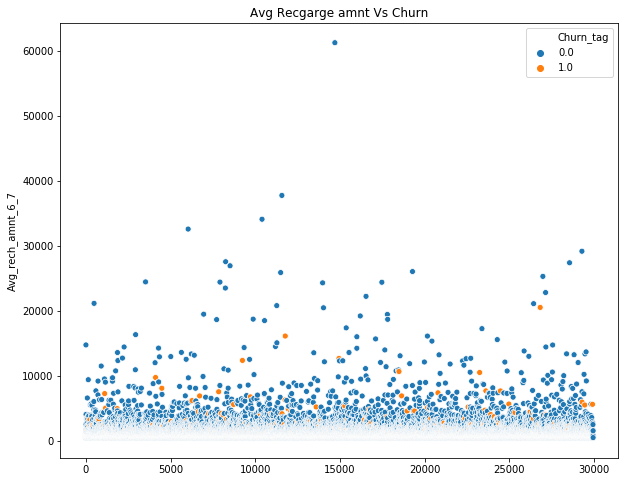

In [0]:
#cheking avg rech amnt for 6 and 7 mnth and churn
plt.figure(figsize=(10, 8))
plt.title('Avg Recgarge amnt Vs Churn')
sns.scatterplot(y=imputed_df['Avg_rech_amnt_6_7'], x=imputed_df.index, hue=imputed_df['Churn_tag'])
plt.show()

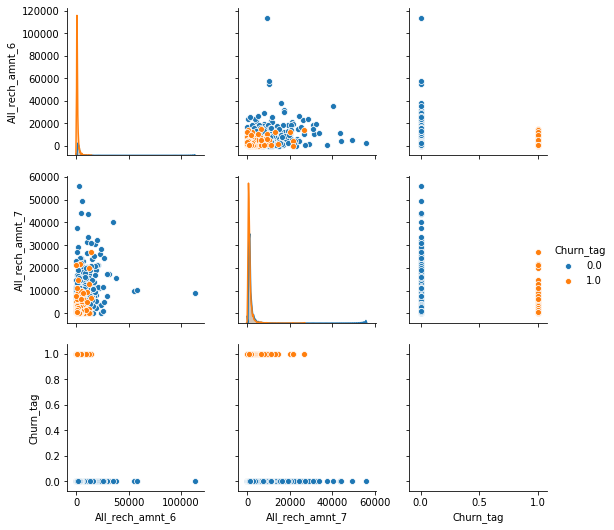

In [0]:
# Lets get All rechreg amnt calls for 6 and 7 mnth w.r.t churn
sns.pairplot(data=imputed_df[['All_rech_amnt_6','All_rech_amnt_7','Churn_tag']], hue='Churn_tag')
plt.show()

Looks like people who rechregd in the month 6 though the rechrg amnt is less the churn is low. However in 7th month rechg amnt is increased so was the churn.

<Figure size 360x360 with 0 Axes>

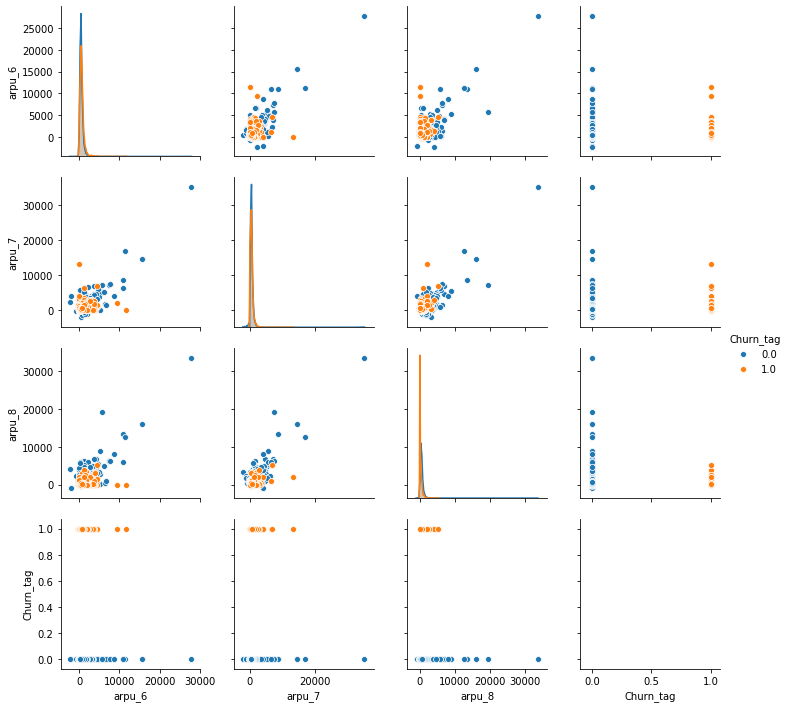

In [0]:
# Lets now see the arpu for 678 mnts
plt.figure(figsize=(5,5))
sns.pairplot(data=imputed_df[['arpu_6','arpu_7','arpu_8','Churn_tag']], hue='Churn_tag')
plt.show()

We can infer that customers who has low arpu are highly likely to churn when compared with high arpu

<Figure size 360x360 with 0 Axes>

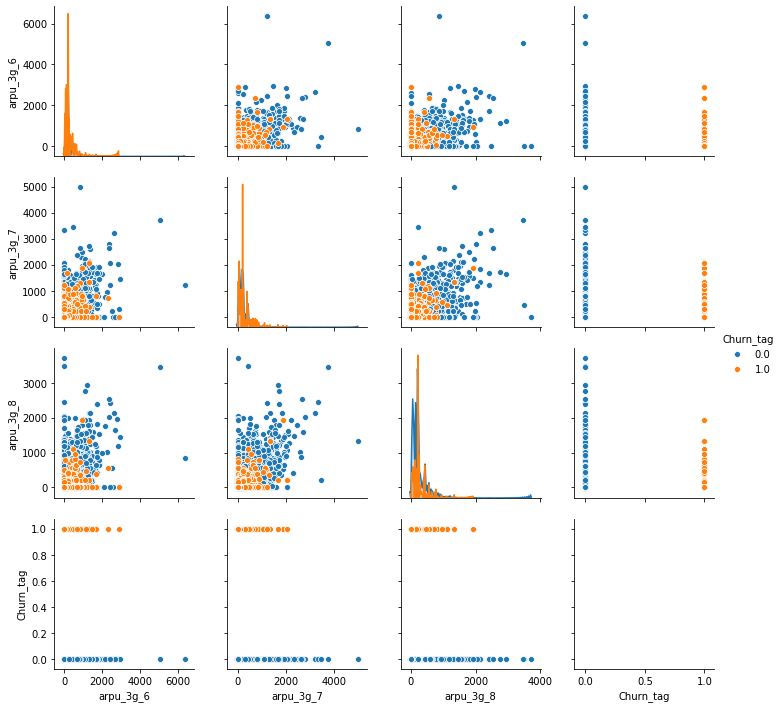

In [0]:
# Lets look ar the data recharge for the 678 mnts
# Lets now see the arpu for 678 mnts
plt.figure(figsize=(5,5))
sns.pairplot(data=imputed_df[['arpu_3g_6','arpu_3g_7','arpu_3g_8','Churn_tag']], hue='Churn_tag')
plt.show()

We can infer that though some customers who have high avg rech of data have churned in the month of 7 and 8.

<Figure size 360x360 with 0 Axes>

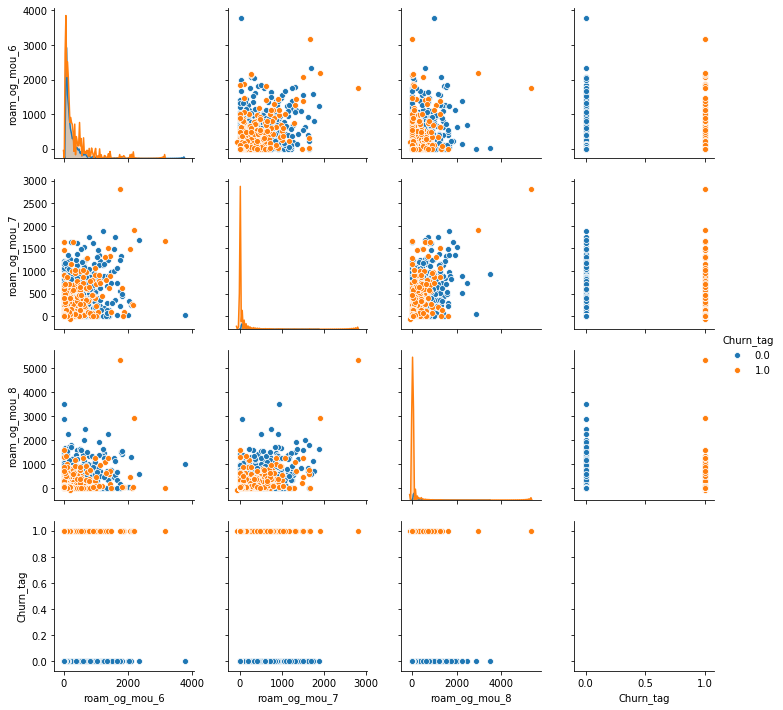

In [0]:
#Lets look at roaming outgoing usage churn
# Lets look ar the data recharge for the 678 mnts
plt.figure(figsize=(5,5))
sns.pairplot(data=imputed_df[['roam_og_mou_6','roam_og_mou_7','roam_og_mou_8','Churn_tag']], hue='Churn_tag')
plt.show()

There is a useful insight here:
- This can also be seen as people when traveling to new places switch to different n/w or buy new network to avoid high roaming chargesat people who roam and use low to moderate usage ~500 -1000 are highly likely to churn when compared with people who have usage above 1000. 

<Figure size 360x360 with 0 Axes>

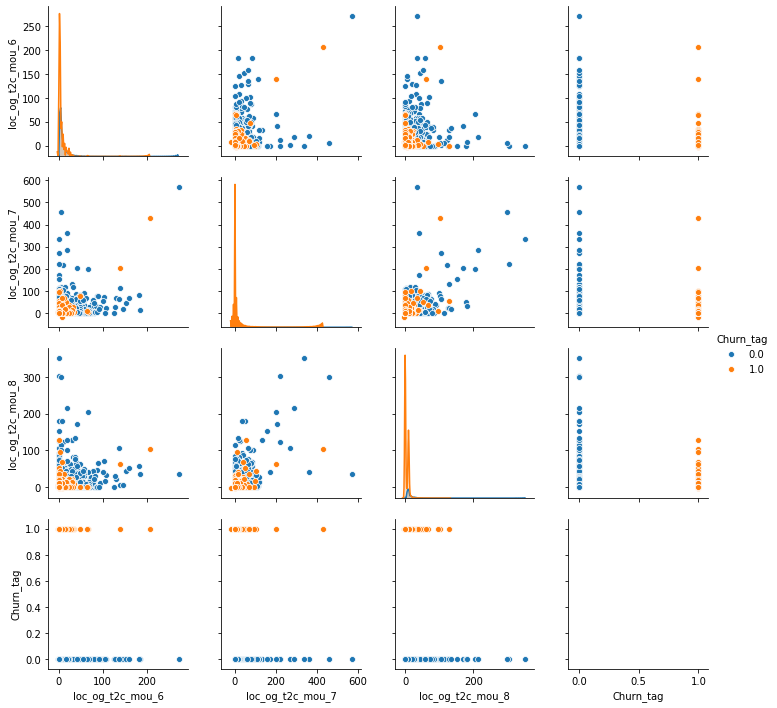

In [0]:
# Lets look at chrn w.er.t call center calls local
plt.figure(figsize=(5,5))
sns.pairplot(data=imputed_df[['loc_og_t2c_mou_6','loc_og_t2c_mou_7','loc_og_t2c_mou_8','Churn_tag']], hue='Churn_tag')
plt.show()

People who have less usage of call center mou are highly ikely to churn when compared with people who frequently use call center to solve any issues


<Figure size 360x360 with 0 Axes>

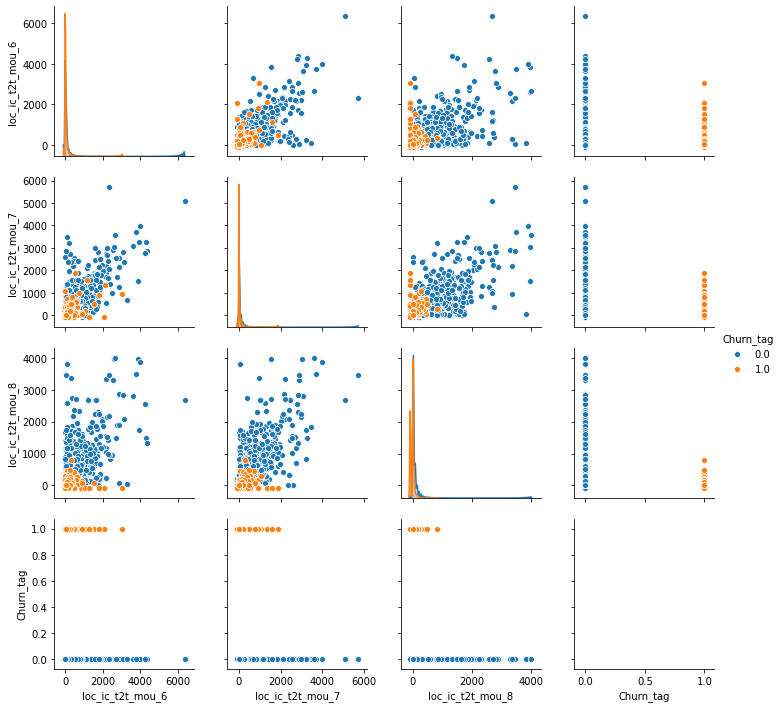

In [0]:
# Lets look at cuhrn w.r.t total incoming calls from same n/w: t2t
plt.figure(figsize=(5,5))
sns.pairplot(data=imputed_df[['loc_ic_t2t_mou_6','loc_ic_t2t_mou_7','loc_ic_t2t_mou_8','Churn_tag']], hue='Churn_tag')
plt.show()

The churn for incoming t2t is low as the usage cust here might only get calls from his earning urban counterpart and the churn is less likely to happen.

In [0]:
# Getting the correlation matrix and showing the highly inflencing parameters
imputed_df.corr()[['Churn_tag']].sort_values(by = 'Churn_tag', ascending = False)

,Churn_tag
Churn_tag,1.00
spl_og_mou_8,0.14
std_og_mou_6,0.13
roam_og_mou_8,0.11
std_og_t2m_mou_6,0.10
roam_ic_mou_8,0.10
roam_og_mou_7,0.10
std_og_t2t_mou_6,0.09
loc_og_t2c_mou_8,0.08
total_og_mou_6,0.08


Top 5 Highly Propertionately influencing Churning Customers:
* total_og_mou_6	
* arpu_6
* total_rech_amt_6
* total_rech_num_6
* All_rech_amnt_6

Top 4 Inverse Propertionately inflencing Churning rate:
* date_of_last_rech_8
* fb_user_8
* date_of_last_rech_data_8
* total_ic_mou_8
* total_rech_amt_8

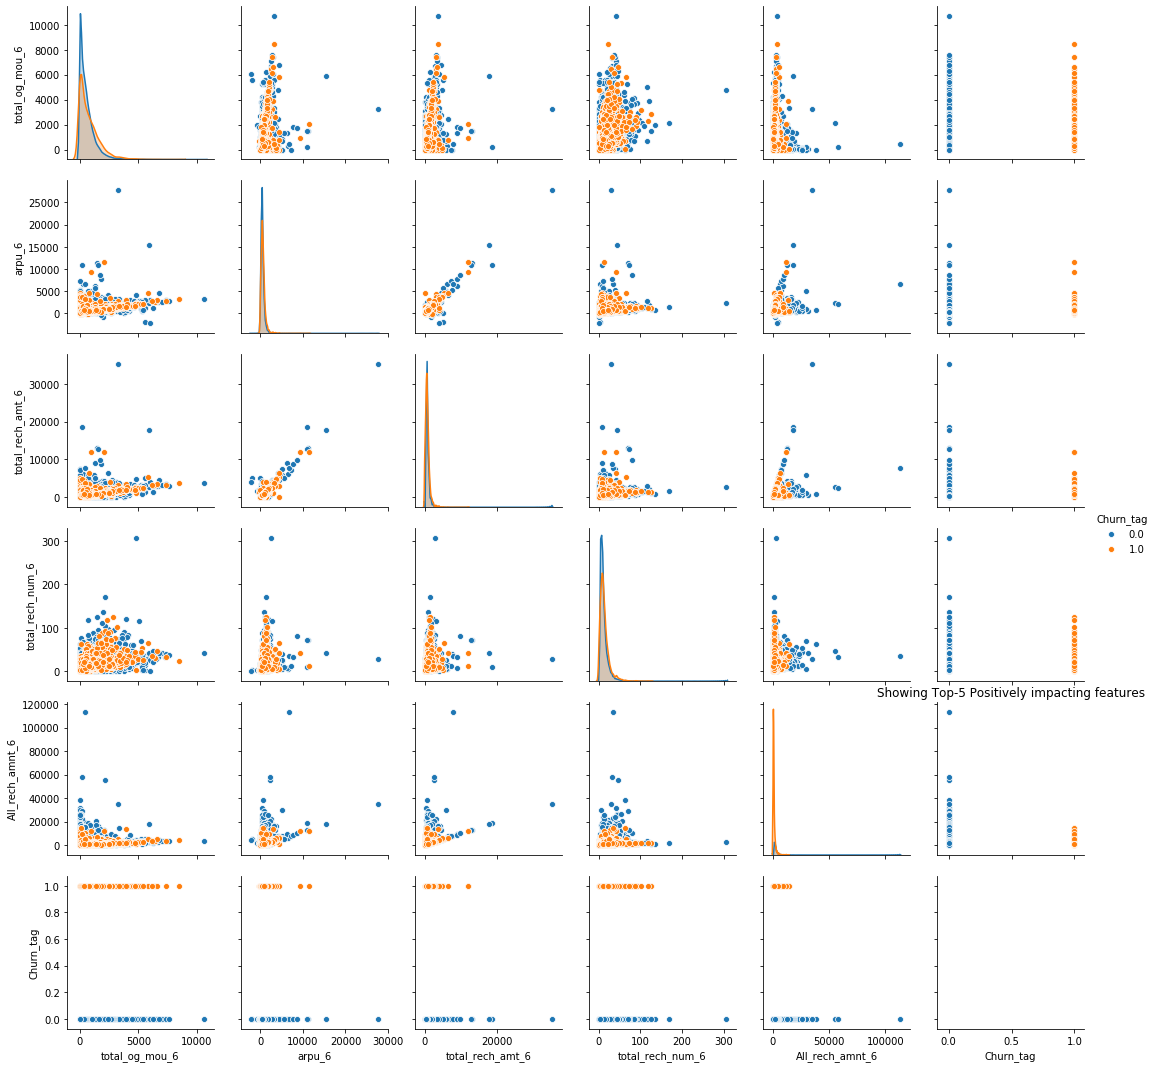

In [0]:
sns.pairplot(data=imputed_df[['total_og_mou_6',
                              'arpu_6',
                              'total_rech_amt_6',
                              'total_rech_num_6',
                              'All_rech_amnt_6',
                              'Churn_tag']], hue='Churn_tag')
plt.title('Showing Top-5 Positively impacting features')
plt.show()

Basically we can see that the the postively corellated elements are interrelated like, while the total recharge amount is high so will be the avg recharge amnt for a user. This means the the outgoing recharge calls and amount and the data recharge amount will be chnging as per changes in recharge amount

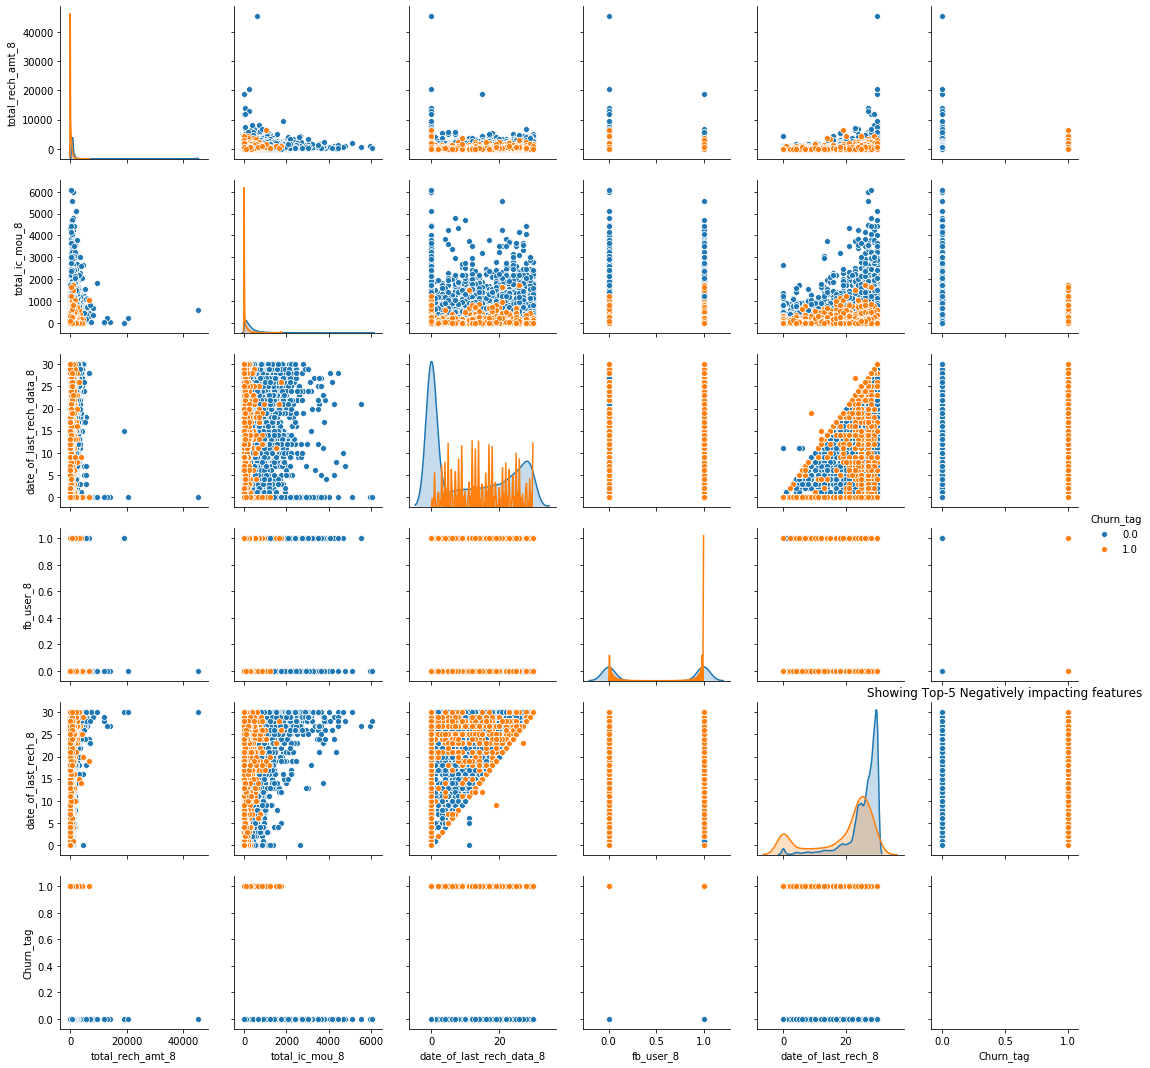

In [0]:
sns.pairplot(data=imputed_df[['total_rech_amt_8',
                              'total_ic_mou_8',
                              'date_of_last_rech_data_8',
                              'fb_user_8',
                              'date_of_last_rech_8',
                              'Churn_tag']], hue='Churn_tag')
plt.title('Showing Top-5 Negatively impacting features')
plt.show()

There attributes are negtively corellated with churn. That means whereer the incoming calls are high the churn is low. also, we can see that when the no of days of last recharge in a month increase the churn negatively increases. 

# Modelling
- We do the the below to hit the target objectives:
 1.It will be used to predict whether a high-value customer will churn or not, in near future (i.e. churn phase). By knowing this, the company can take action steps such as providing special plans, discounts on recharge etc.

 2. It will be used to identify important variables that are strong predictors of churn. These variables may also indicate why customers choose to switch to other networks.
 We execute the below plan for the above objectives:
  - PCA
    - As there are more number of attributes, PCA is obvious for dimensionality reduction
  - Logistic Regression:
    - We'll get a bench mark or baseline prediction using logistic regrssion
  - Random Forest:
    - Data imbalance is handled well by ensemble models
    - Ensembel models using bagging and bootstaping which provides good accuracy over conventional models
    - Also we can get feature importance which servers the 2nd bussiness objectie
  - Boosting:
    - We use different boosting algorthms to get to required accuracy for churn classification
      - Adabosting
      - Gradient Boosting
      - XGBoost
Evaluation metrics: 
 - At each stage of this modelling we review different evaluation metrics to identify high-performing model of all these models

# TEST/TRAIN SPLIT

In [0]:
#Splitting target and independent variables to X and Y for modelling
X = imputed_df.drop('Churn_tag', axis = 1)
y = imputed_df.Churn_tag

In [0]:
#splitting the data set to test and train
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3, random_state=42)

# Feature Scaling

In [0]:
#Getting the scaling libbrary
from sklearn.preprocessing import StandardScaler

In [0]:
#Intiating the scaler
scaler = StandardScaler()

#Scalling both X test and train
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Applying Logistic regression
## Using Class-Imbalance

In [0]:
#Get the logistic regression from library
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

from sklearn.model_selection import GridSearchCV

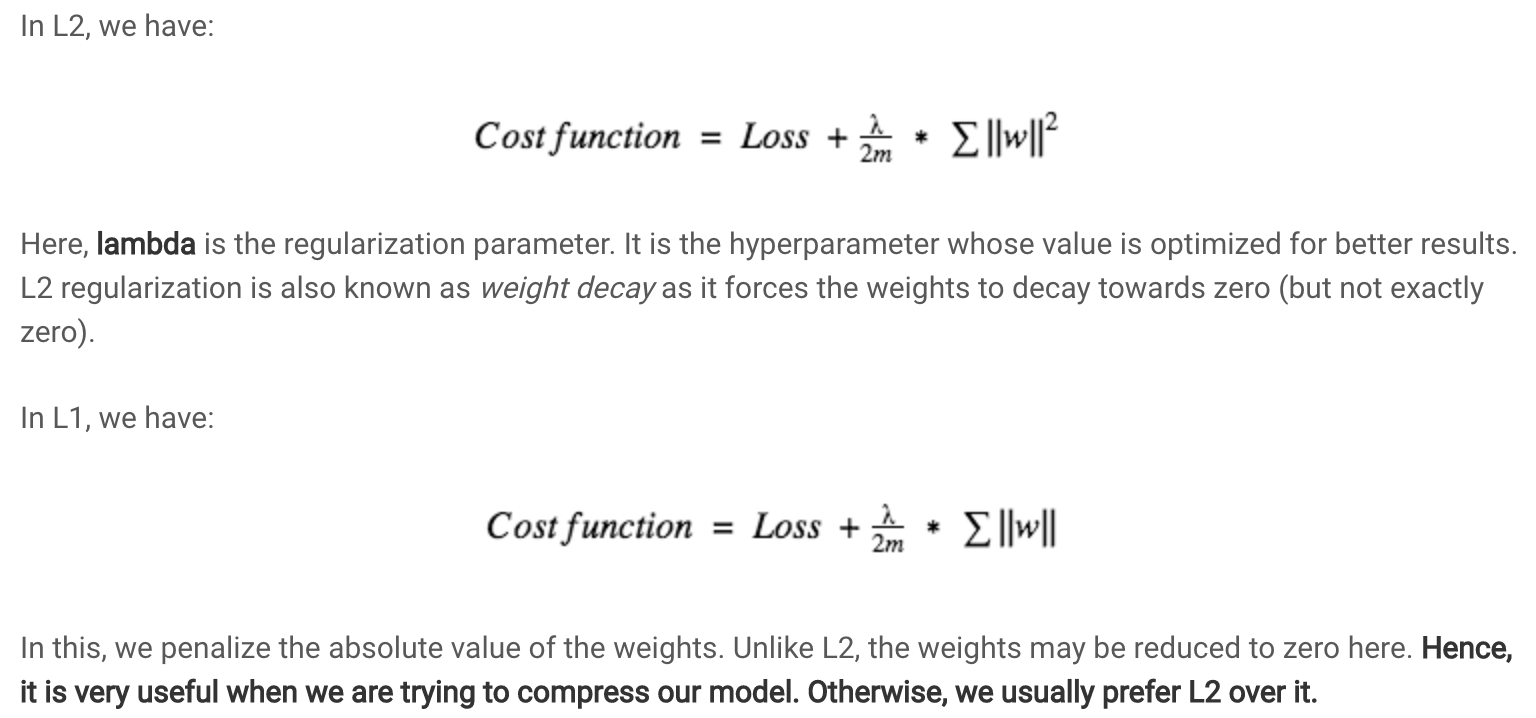

In [0]:
# # Using KFold method to get the best combination of hyper parameters
params = {'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1, 2], 
          'penalty': ['l1', 'l2'], 
          'class_weight': ['balanced',{0:0.4, 1:0.6} ]}

# params = [{'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5, 0.8, 1, 2]}, 
#           {'penalty': ['l1'], 'solver': [ 'lbfgs', 'liblinear', 'sag', 'saga']},
#           {'penalty': ['l2'], 'solver': ['newton-cg']}, 
#           {'class_weight': ['balanced',{0:0.4, 1:0.6} ]}]


log_model = LogisticRegression(random_state= 85)

model = GridSearchCV(estimator = log_model,
                     param_grid = params,
                     scoring = 'recall',
                     cv  = 5)

model.fit(X_train, y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=85, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.0001, 0.001, 0.005, 0.1, 0.2, 0.3, 0.4, 0.5,
                               0.8, 1, 2],
                         'class_weight': ['balanced', {0: 0.4, 1: 0.6}],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='recall', ve

In [0]:
#Get the best parametrs for above
model.best_params_

{'C': 0.005, 'class_weight': 'balanced', 'penalty': 'l2'}

In [0]:
# Applying best values for the model
from sklearn import metrics
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report
log_reg_final = LogisticRegression(penalty = 'l2', 
                                   C = 0.005,
                                   class_weight = 'balanced')

log_reg_final.fit(X_train, y_train)
y_pred_test_final = log_reg_final.predict(X_test)
print("Accuracy: \t\t{}".format(round(metrics.accuracy_score(y_test, y_pred_test_final), 2)))
print("Recall/Sensitivty: \t{}".format(round(metrics.recall_score(y_test, y_pred_test_final), 2)))

Accuracy: 		0.85
Recall/Sensitivty: 	0.84


In [0]:
print(classification_report(y_test,y_pred_test_final))

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      8248
         1.0       0.34      0.84      0.49       738

    accuracy                           0.85      8986
   macro avg       0.66      0.85      0.70      8986
weighted avg       0.93      0.85      0.88      8986



# Applying PCA:
  - Since there is data imbalance in the churn as there are more number of non-churn customers compared with churn customers.

In [0]:
#Libraries for PCA
from sklearn.decomposition import PCA

In [0]:
#Instantiate PCA
pca=PCA(svd_solver='randomized', random_state=85)

In [0]:
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=85,
    svd_solver='randomized', tol=0.0, whiten=False)

In [0]:
#Analysing PCA components
pca.components_

array([[-3.68822662e-02, -3.28104855e-02, -2.52982346e-02, ...,
         1.37135087e-01,  1.11633562e-01,  1.26652034e-01],
       [ 1.63748056e-01,  1.77023567e-01,  1.79481357e-01, ...,
         2.79298453e-02,  8.60645782e-02,  9.85782231e-02],
       [ 8.44603957e-02,  1.08039869e-01,  9.53308263e-02, ...,
         1.03243326e-01,  1.30402364e-01,  1.41278814e-01],
       ...,
       [ 0.00000000e+00,  2.25857458e-16,  1.30615880e-16, ...,
         6.14430915e-03, -1.07120616e-01,  1.58003446e-01],
       [-0.00000000e+00,  3.62368838e-17,  1.66716154e-16, ...,
         5.79209744e-02,  1.12382700e-02, -1.18857269e-01],
       [ 0.00000000e+00,  4.83985397e-17, -2.83456373e-16, ...,
         9.56973514e-02, -3.54056083e-01,  3.90572588e-01]])

In [0]:
#How much variance is explined by the principal components
pca.explained_variance_ratio_

array([1.18498745e-01, 8.85056084e-02, 6.38008906e-02, 5.60070106e-02,
       3.63008881e-02, 3.03323220e-02, 2.94033257e-02, 2.52960619e-02,
       2.34056486e-02, 2.18257895e-02, 2.08903869e-02, 2.01157515e-02,
       1.74172955e-02, 1.71906518e-02, 1.70280761e-02, 1.61463386e-02,
       1.57018976e-02, 1.45864260e-02, 1.40264688e-02, 1.36808776e-02,
       1.25357981e-02, 1.08818684e-02, 1.06455681e-02, 1.04088683e-02,
       1.01353041e-02, 9.56759045e-03, 8.94056820e-03, 8.73296110e-03,
       8.35919721e-03, 7.89520673e-03, 7.62780981e-03, 7.23315685e-03,
       6.93417055e-03, 6.78145604e-03, 6.42917927e-03, 6.32120076e-03,
       6.19612896e-03, 6.04540760e-03, 5.79707318e-03, 5.51371878e-03,
       5.32065618e-03, 5.28120192e-03, 5.14775127e-03, 5.07135390e-03,
       4.98015183e-03, 4.90209145e-03, 4.74465923e-03, 4.57536951e-03,
       4.52110822e-03, 4.46672262e-03, 4.36493161e-03, 4.25981115e-03,
       4.03020423e-03, 3.85788594e-03, 3.80671270e-03, 3.66168977e-03,
      

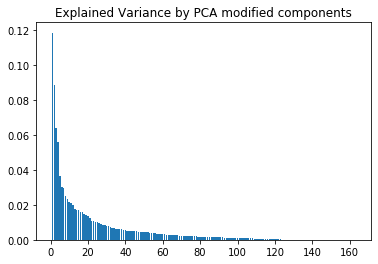

In [0]:
#Plotting the variance ratio for bettter visibility of variance explinantion
plt.bar(range(1, len(pca.explained_variance_ratio_)+1),pca.explained_variance_ratio_)
plt.title('Explained Variance by PCA modified components')
plt.show()

In [0]:
#Calculating Cumulative sum of the variaance to determine the variance ratio of principal componeents 
#in cumulative way
import numpy as np
cum_sum=np.cumsum(pca.explained_variance_ratio_)
#cum_sum=np.round(cum_sum,2)

Text(0.5, 0, 'Number of PCA Components')

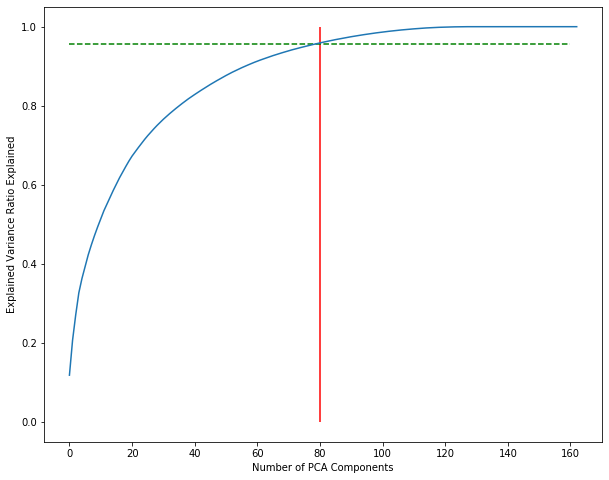

In [0]:
plt.figure(figsize= (10, 8))

plt.vlines(x = 80, ymax = 1, ymin = 0, colors = 'r', linestyles = '-')
plt.hlines(y = 0.955, xmin = 0, xmax = 160, colors = 'g', linestyles= '--')
plt.plot(cum_sum)

plt.ylabel('Explained Variance Ratio Explained')
plt.xlabel('Number of PCA Components')

We can see that PCA gave 80 components as optimum componets for variable explination

Incremental PCA with 80 components

In [0]:
from sklearn.decomposition import IncrementalPCA

In [0]:
pca_final = IncrementalPCA(n_components=80)

In [0]:
df_train_pca = pca_final.fit_transform(X_train)

In [0]:
cormat = np.corrcoef(df_train_pca.transpose())

In [0]:
cormat.shape

(80, 80)

In [0]:
# Plotting heatmap showing the variable correlation
# plt.figure(figsize= (20, 20))
# sns.heatmap(round(cormat, 1), annot = True)

In [0]:
# Applying finalized PCA over Test set too
df_test_pca = pca_final.transform(X_test)

In [0]:
df_test_pca.shape

(8986, 80)

Now Applying logistic over PCA dataset 

In [0]:
learner_pca = LogisticRegression()

In [0]:
model_pca = learner_pca.fit(df_train_pca, y_train)

In [0]:
# Making Prediction on the test set
pred_probs_test = model_pca.predict(df_test_pca)

In [0]:
# Confusion Matrix
confusion_matrix(y_test,pred_probs_test)

array([[8160,   88],
       [ 461,  277]])

In [0]:
print(classification_report(y_test,pred_probs_test))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.76      0.38      0.50       738

    accuracy                           0.94      8986
   macro avg       0.85      0.68      0.73      8986
weighted avg       0.93      0.94      0.93      8986



In [0]:
accuracy_score(y_test,pred_probs_test)

0.9389049632762074

In [0]:
from sklearn.metrics import precision_score,recall_score
precision_score(y_test,pred_probs_test)

0.7589041095890411

In [0]:
recall_score(y_test,pred_probs_test)

0.37533875338753386

Using logistic regression we are getting an accuracy of 93

# Applying Random forest model

In [0]:

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier

# Running the random forest with default parameters.
rfc = RandomForestClassifier(class_weight='balanced')

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [0]:
#Preddictions
prediction= rfc.predict(X_test)

In [0]:
print(classification_report(y_test,prediction))

              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.80      0.43      0.56       738

    accuracy                           0.94      8986
   macro avg       0.88      0.71      0.76      8986
weighted avg       0.94      0.94      0.94      8986



In [0]:
print(accuracy_score(y_test,prediction))

0.9444691742710883


let's now look at the list of hyperparameters which we can tune to improve model performance.

## Hyperparameter Tuning: Random Forest

In [0]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [4,8,10],
    'min_samples_leaf': range(100, 400, 200),
    'min_samples_split': range(200, 500, 200),
    'n_estimators': [100,200, 300], 
    'max_features': [5, 10],
    'class_weight': ['balanced',{0:0.4, 1:0.6} ]
    }
# Create a based model
rf = RandomForestClassifier(random_state = 85)

# Instantiate the grid search model
grid_search = GridSearchCV( estimator = rf, 
                            param_grid = param_grid, 
                            cv = 3, 
                            n_jobs = -1,
                            verbose = 1)

In [0]:
# Fit the grid search to the data
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done 120 tasks      | elapsed:   29.1s
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed:  1.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=85,
                                  

In [0]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using\n',grid_search.best_params_)

We can get accuracy of 0.9428148996041399 using
 {'class_weight': {0: 0.4, 1: 0.6}, 'max_depth': 10, 'max_features': 10, 'min_samples_leaf': 100, 'min_samples_split': 200, 'n_estimators': 200}


**Fitting the final model with the best parameters obtained from grid search.**

In [0]:
# model with the best hyperparameters
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(bootstrap=True,
                             max_depth=10,
                             min_samples_leaf=100, 
                             min_samples_split=200,
                             max_features=10,
                             n_estimators=200,
                             class_weight = {0: 0.4, 1: 0.6},
                             random_state = 85)

In [0]:
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                       class_weight={0: 0.4, 1: 0.6}, criterion='gini',
                       max_depth=10, max_features=10, max_leaf_nodes=None,
                       max_samples=None, min_impurity_decrease=0.0,
                       min_impurity_split=None, min_samples_leaf=100,
                       min_samples_split=200, min_weight_fraction_leaf=0.0,
                       n_estimators=200, n_jobs=None, oob_score=False,
                       random_state=85, verbose=0, warm_start=False)

In [0]:
# predict
predictions = rfc.predict(X_test)

In [0]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.77      0.49      0.59       738

    accuracy                           0.95      8986
   macro avg       0.86      0.74      0.78      8986
weighted avg       0.94      0.95      0.94      8986



In [0]:
print(accuracy_score(y_test,predictions))

0.9455820164700646


In [0]:
important_features = rfc.feature_importances_
col_names =  X.columns

Imp_featurs = pd.DataFrame(sorted(zip(important_features, list(col_names)), reverse=True),columns={'colName','value'})
Imp_featurs

,colName,value
0,0.11,total_ic_mou_8
1,0.07,arpu_8
2,0.05,total_og_mou_8
3,0.04,loc_og_mou_8
4,0.04,roam_og_mou_8
5,0.04,loc_ic_t2t_mou_8
6,0.04,total_rech_amt_8
7,0.03,std_ic_mou_8
8,0.03,last_day_rch_amt_8
9,0.03,max_rech_amt_8


Basically, we are looking for high 'Recall' values as
recall= TP/(TP+FN). 
  - We need more less false negetives, i.e we are looking for people who can be identified as churners though they are not chrnurs.
  - But we are not letting the actual churners slip away using recall as falsly predicted non-churners accuracy is what we are considering
Looking at the above values:
* Accuracy: 94.5%
* Recall:0.49%


Random forest has specified that important features would be 
  - total_ic_mou_8
  - arpu_8
  - total_og_mou_8
  - loc_og_mou_8
  - roam_og_mou_8

# Applying AdaBoost Classifiers

Lets implement Ada/Gradient boosting and ssee the acuarrcy

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier


In [0]:
# base estimator: a weak learner with max_depth=2
shallow_tree = DecisionTreeClassifier(max_depth=2, random_state = 100)

In [0]:
# fit the shallow decision tree 
shallow_tree.fit(X_train, y_train)

# test error
y_pred = shallow_tree.predict(X_test)
score = metrics.accuracy_score(y_test, y_pred)
score

0.9451368795904741

Now, we will see the accuracy using the AdaBoost algorithm. In this following code, we will write code to calculate the accuracy of the AdaBoost models as we increase the number of trees from 1 to 50 with a step of 3 in the lines:

'estimators = list(range(1,100,5))'

'for n_est in estimators:'

We finally end up with the accuracy of all the models in a single list abc_scores.

## Hyperparameter Tuning: Adaboost

In [0]:
#ada boost with tree as estimator
estimators=list(range(1,100,5))

abc_scores=[]
for n_est in estimators:
    ABC = AdaBoostClassifier(base_estimator=shallow_tree, 
                              n_estimators = n_est,
                             random_state = 85)
    
    ABC.fit(X_train, y_train)
    y_pred = ABC.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    abc_scores.append(score)

In [0]:
#Getting the ADaBoosting scores
abc_scores

[0.9451368795904741,
 0.945470732250167,
 0.945470732250167,
 0.9461384375695526,
 0.9450255953705764,
 0.9438014689517027,
 0.9446917427108836,
 0.9455820164700646,
 0.9449143111506788,
 0.9449143111506788,
 0.9440240373914979,
 0.9450255953705764,
 0.9440240373914979,
 0.9442466058312932,
 0.9450255953705764,
 0.9443578900511908,
 0.9444691742710883,
 0.9440240373914979,
 0.943690184731805,
 0.9443578900511908]

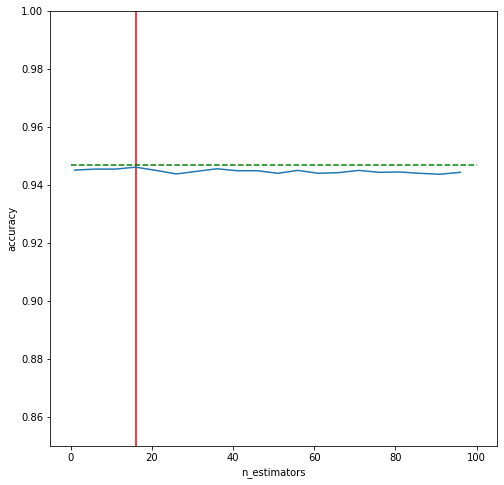

In [0]:
# plot test scores and n_estimators
# plot
plt.figure(figsize=(8,8))

plt.plot(estimators, abc_scores)
plt.vlines(x = 16, ymax = 1, ymin = 0, colors = 'r', linestyles = '-')
plt.hlines(y = .9469, xmin = 0, xmax = 100, colors = 'g', linestyles= '--')
plt.xlabel('n_estimators')
plt.ylabel('accuracy')
plt.ylim([0.85, 1])
plt.show()

We can get a max accuracy of 94.6percentage @16 estimators using random forest

In [0]:
# model with the best hyperparameters
from sklearn.ensemble import AdaBoostClassifier
adaBoostFinal = AdaBoostClassifier( n_estimators=16,
                                   random_state = 85)

In [0]:
#Adaboost final hyper parametrs model fit
adaBoostFinal.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1.0,
                   n_estimators=16, random_state=85)

In [0]:
#adaboost prediction on test set
adaBoostPredictions = adaBoostFinal.predict(X_test)

In [0]:
#Evaluation metrics Adaboost
print(classification_report(y_test,adaBoostPredictions))
print(accuracy_score(y_test,adaBoostPredictions))

              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8248
         1.0       0.73      0.51      0.60       738

    accuracy                           0.94      8986
   macro avg       0.84      0.74      0.78      8986
weighted avg       0.94      0.94      0.94      8986

0.9439127531716003


In [0]:
#Important fetures from AdaBoost
important_features_1 = adaBoostFinal.feature_importances_
col_names_1 = X.columns

In [0]:
imp_features = pd.DataFrame(sorted(zip(important_features_1, list(col_names_1)), reverse=True),columns={'colName','value'})
imp_features

,colName,value
0,0.19,date_of_last_rech_8
1,0.12,total_ic_mou_8
2,0.06,total_rech_num_7
3,0.06,sep_vbc_3g
4,0.06,roam_og_mou_8
5,0.06,roam_ic_mou_8
6,0.06,loc_og_t2m_mou_8
7,0.06,loc_ic_mou_8
8,0.06,loc_ic_mou_7
9,0.06,last_day_rch_amt_8


# Applying Gradient Boosting

Lets see how Gradient bossting works

In [0]:
# Fit classifier with out-of-bag estimates
from sklearn.ensemble import GradientBoostingClassifier
params = {'n_estimators': 200, 
          'max_depth': 3, 
          'subsample': 0.5,
          'learning_rate': 0.01, 
          'min_samples_leaf': 10, 
          'random_state': 9999}
          
GBM = GradientBoostingClassifier(**params)

In [0]:
GBM.fit(X_train,y_train)

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=10, min_samples_split=2,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=9999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
#Prediction of test set using GBM
gbm_prediction=GBM.predict(X_test)

In [0]:
#Evaluation etrics for GBM
print(classification_report(y_test, gbm_prediction))
accuracy = metrics.accuracy_score(y_test, gbm_prediction)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.78      0.46      0.58       738

    accuracy                           0.94      8986
   macro avg       0.87      0.72      0.77      8986
weighted avg       0.94      0.94      0.94      8986

Accuracy for the test dataset 94.5%



Accuracy of prediction incresed to - 94.6%


## Hyperparameter Tunning: Gradient Boosting

In [0]:
from sklearn.model_selection import GridSearchCV   #Perforing grid search

# Fit classifier with out-of-bag estimates
param_test = {'n_estimators':range(200,500,100),
              'min_samples_leaf': range(50, 450, 200),
              'min_samples_split': range(50, 450, 200), 
              'max_depth':range(5,8,1)}

grid_search = GridSearchCV(estimator = GradientBoostingClassifier(learning_rate=0.05,
                                          subsample=0.1,
                                          random_state=9999,verbose = 2), 
                           param_grid = param_test, 
                           scoring='roc_auc',
                           n_jobs=-1,
                           iid=False, 
                           cv=None,
                           verbose=2)

In [0]:
#applying GBM with grid search
grid_search.fit(X_train,y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 40 concurrent workers.
[Parallel(n_jobs=-1)]: Done  82 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 180 out of 180 | elapsed:  2.4min finished


      Iter       Train Loss      OOB Improve   Remaining Time 
         1           0.5372           0.0277           36.39s
         2           0.5147           0.0220           36.31s
         3           0.4454           0.0178           37.00s
         4           0.4991           0.0154           36.81s
         5           0.4627           0.0123           36.23s
         6           0.4440           0.0104           36.18s
         7           0.4136           0.0090           36.33s
         8           0.4558           0.0086           36.12s
         9           0.4395           0.0085           35.91s
        10           0.4365           0.0073           35.70s
        11           0.3989           0.0073           35.76s
        12           0.3990           0.0052           35.81s
        13           0.4097           0.0054           35.75s
        14           0.3849           0.0055           35.72s
        15           0.3881           0.0054           35.55s
       

GridSearchCV(cv=None, error_score=nan,
             estimator=GradientBoostingClassifier(ccp_alpha=0.0,
                                                  criterion='friedman_mse',
                                                  init=None, learning_rate=0.05,
                                                  loss='deviance', max_depth=3,
                                                  max_features=None,
                                                  max_leaf_nodes=None,
                                                  min_impurity_decrease=0.0,
                                                  min_impurity_split=None,
                                                  min_samples_leaf=1,
                                                  min_samples_split=2,
                                                  min_weight_fraction_leaf=0.0,
                                                  n_estimators=100,
                                                  n_iter_...
                 

In [0]:
#Get the best prameters after hyp-parms tuning
grid_search.best_params_, grid_search.best_score_

({'max_depth': 5,
  'min_samples_leaf': 50,
  'min_samples_split': 250,
  'n_estimators': 400},
 0.9335725614304323)

Now Finalizing Gradient Boosting Hyperparameters

In [0]:
# Fit classifier with out-of-bag estimates
params = {'n_estimators': 200, 
          'min_samples_split': 250,
          'max_depth': 5, 
          'subsample': 0.5,
          'learning_rate': 0.01, 
          'min_samples_leaf': 50, 
          'random_state': 9999}
          
GBM_final = GradientBoostingClassifier(**params)

In [0]:
#fitting final GBM model with best params
GBM_final.fit(X_train,y_train)


GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.01, loss='deviance', max_depth=5,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_impurity_split=None,
                           min_samples_leaf=50, min_samples_split=250,
                           min_weight_fraction_leaf=0.0, n_estimators=200,
                           n_iter_no_change=None, presort='deprecated',
                           random_state=9999, subsample=0.5, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [0]:
# Predicting Using GradientBoosting Final Model
gbmFinal_predict =GBM_final.predict(X_test)


In [0]:
#Model Evaluation metrics
print(classification_report(y_test, gbmFinal_predict))


              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.77      0.48      0.59       738

    accuracy                           0.95      8986
   macro avg       0.86      0.73      0.78      8986
weighted avg       0.94      0.95      0.94      8986



In [0]:
#Model Evaluation metrics
accuracy = metrics.accuracy_score(y_test, gbmFinal_predict)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

Accuracy for the test dataset 94.5%


In [0]:
#Important features predicted by GBM
important_features_2 = GBM_final.feature_importances_
col_names_2 = X.columns

In [0]:
#Creating a dataframe of imp features
imp_features = pd.DataFrame(sorted(zip(important_features_2, list(col_names_2)), reverse=True),columns={'colName','value'})
imp_features

,colName,value
0,0.55,total_ic_mou_8
1,0.04,fb_user_8
2,0.03,date_of_last_rech_8
3,0.03,total_rech_num_7
4,0.03,av_rech_amt_data_8
5,0.03,last_day_rch_amt_8
6,0.02,roam_og_mou_8
7,0.02,max_rech_data_8
8,0.02,loc_ic_mou_8
9,0.01,roam_ic_mou_8


# Applying XGBoost

In [0]:
import xgboost as xgb
from xgboost import XGBClassifier
from xgboost import plot_importance
import gc # for deleting unused variables
from sklearn.metrics import  confusion_matrix,accuracy_score,classification_report

In [0]:
# Choosing Random inputs parameters
xgb_model = xgb.XGBClassifier(
                          n_estimators=250,
                          learning_rate=0.05,
                          n_jobs=4,
                          max_depth=8,
                          colsample_bytree=0.55,
                          gamma=0.23,
                          cv = None,
                          scoring='f1_weighted',
                          random_state = 85
              )

In [0]:
#running XGB with random values
xgb_model1 = xgb_model.fit(X_train,y_train)

In [0]:
#Predicting with random values
xgb_train_predict = xgb_model1.predict(X_train)

In [0]:
#Model evaluation on traing set
print(classification_report(y_train, xgb_train_predict))


              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00     19272
         1.0       1.00      0.99      0.99      1695

    accuracy                           1.00     20967
   macro avg       1.00      0.99      1.00     20967
weighted avg       1.00      1.00      1.00     20967



In [0]:
#running the random parms model on test set
xgb_test_predict = xgb_model1.predict(X_test)


In [0]:
#Model evaluation metrics
print(classification_report(y_test, xgb_test_predict))


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.76      0.53      0.62       738

    accuracy                           0.95      8986
   macro avg       0.86      0.76      0.80      8986
weighted avg       0.94      0.95      0.94      8986



## Hyperparameter Tunning: XGBoost

In [0]:
#Getting required libraries and using startified Kfold samping
from sklearn.model_selection import StratifiedKFold, GridSearchCV

xgb_mod = XGBClassifier(random_state= 85)

params = {
            'eta': np.arange(0.1),
            'gamma': [ 0.1, 0.2, 0.25, 0.35, 0.45],
        }

skf = StratifiedKFold(n_splits=10, shuffle = True)

xgBoost_cvFold = GridSearchCV(xgb_model, 
                    param_grid = params, 
                    scoring = 'roc_auc', 
                    n_jobs = -1, 
                    cv = skf.split(X_train, y_train),
                    refit = "accuracy_score")

In [0]:
#Applying the XGboost and crossfold on train set 
xgBoost_cvFold.fit(X_train, y_train)

GridSearchCV(cv=<generator object _BaseKFold.split at 0x7f149f7e9a98>,
             error_score=nan,
             estimator=XGBClassifier(base_score=0.5, booster='gbtree',
                                     colsample_bylevel=1, colsample_bynode=1,
                                     colsample_bytree=0.55, cv=None, gamma=0.23,
                                     learning_rate=0.05, max_delta_step=0,
                                     max_depth=8, min_child_weight=1,
                                     missing=None, n_estimators=250, n_jobs=4,
                                     nthread=None, objective='binary:logistic',
                                     random_state=85, reg_alpha=0, reg_lambda=1,
                                     scale_pos_weight=1, scoring='f1_weighted',
                                     seed=None, silent=None, subsample=1,
                                     verbosity=1),
             iid='deprecated', n_jobs=-1,
             param_grid={'eta': array

In [0]:
#Getting best parameters
best_pars = xgBoost_cvFold.best_params_
best_pars

{'eta': 0.0, 'gamma': 0.25}

Applying Best suited param values

In [0]:
#Building a model using the best params
xgb_final = xgb.XGBClassifier(
                          eta = 0.0,
                          n_estimators=250,
                          learning_rate=0.05,
                          n_jobs=4,
                          max_depth=8,
                          colsample_bytree=0.55,
                          gamma=0.1,
                          cv = None,
                          scoring='f1_weighted',
                          random_state = 85
              )

In [0]:
#Final model on train set
xgb_final.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.55, cv=None, eta=0.0,
              gamma=0.1, learning_rate=0.05, max_delta_step=0, max_depth=8,
              min_child_weight=1, missing=None, n_estimators=250, n_jobs=4,
              nthread=None, objective='binary:logistic', random_state=85,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1,
              scoring='f1_weighted', seed=None, silent=None, subsample=1,
              verbosity=1)

In [0]:
#Final model on test set prediction
xgb_Final_test_predict = xgb_final.predict(X_test)

In [0]:
#Model evaluation metrics
print(classification_report(y_test, xgb_Final_test_predict))


              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.77      0.52      0.62       738

    accuracy                           0.95      8986
   macro avg       0.86      0.75      0.80      8986
weighted avg       0.94      0.95      0.94      8986



In [0]:
#Modelling XGBoost evaluation metrics
from sklearn import metrics

accuracy = metrics.accuracy_score(y_test, xgb_Final_test_predict)
print("Accuracy for the test dataset",'{:.1%}'.format(accuracy))

Accuracy for the test dataset 94.8%


In [0]:
#XG boost important features
important_features_3 = xgb_final.feature_importances_
col_names_3 = X.columns

In [0]:
#Important features dataframe
imp_features = pd.DataFrame(sorted(zip(important_features_3, list(col_names_3)),  reverse=True),columns={'colName','Value'})
imp_features

,colName,Value
0,0.15,fb_user_8
1,0.08,total_ic_mou_8
2,0.04,total_rech_data_8
3,0.04,total_og_mou_8
4,0.02,roam_og_mou_8
5,0.02,last_day_rch_amt_8
6,0.01,av_rech_amt_data_8
7,0.01,max_rech_data_8
8,0.01,roam_ic_mou_8
9,0.01,sep_vbc_3g


Recall and Accuracy Parameter Conclusion:

Logistic Regression:

              precision    recall  f1-score   support

         0.0       0.98      0.85      0.91      8248
         1.0       0.34      0.84      0.49       738

    accuracy                           0.85      8986
   macro avg       0.66      0.85      0.70      8986
   
weighted avg       0.93      0.85      0.88      8986


PCA:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.76      0.38      0.50       738

    accuracy                           0.94      8986
   macro avg       0.85      0.68      0.73      8986
weighted avg       0.93      0.94      0.93      8986



Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.77      0.49      0.59       738

    accuracy                           0.95      8986
   macro avg       0.86      0.74      0.78      8986
weighted avg       0.94      0.95      0.94      8986




Adaboost:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8248
         1.0       0.73      0.51      0.60       738

    accuracy                           0.94      8986
   macro avg       0.84      0.74      0.78      8986
weighted avg       0.94      0.94      0.94      8986




Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.77      0.48      0.59       738

    accuracy                           0.95      8986
   macro avg       0.86      0.73      0.78      8986
weighted avg       0.94      0.95      0.94      8986



XGBoosting:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.77      0.52      0.62       738

    accuracy                           0.95      8986
   macro avg       0.86      0.75      0.80      8986
weighted avg       0.94      0.95      0.94      8986








In [0]:
recall  f1-score   support

         0.0       0.98      0.85      0.91      8248
         1.0       0.34      0.84      0.49       738

    accuracy                           0.85      8986
   macro avg       0.66      0.85      0.70      8986
weighted avg       0.93      0.85      0.88      8986


PCA:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.76      0.38      0.50       738

    accuracy                           0.94      8986
   macro avg       0.85      0.68      0.73      8986
weighted avg       0.93      0.94      0.93      8986



Random Forest:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.77      0.49      0.59       738

    accuracy                           0.95      8986
   macro avg       0.86      0.74      0.78      8986
weighted avg       0.94      0.95      0.94      8986




Adaboost:
              precision    recall  f1-score   support

         0.0       0.96      0.98      0.97      8248
         1.0       0.73      0.51      0.60       738

    accuracy                           0.94      8986
   macro avg       0.84      0.74      0.78      8986
weighted avg       0.94      0.94      0.94      8986




Gradient Boosting:
              precision    recall  f1-score   support

         0.0       0.95      0.99      0.97      8248
         1.0       0.77      0.48      0.59       738

    accuracy                           0.95      8986
   macro avg       0.86      0.73      0.78      8986
weighted avg       0.94      0.95      0.94      8986



XGBoosting:
              precision    recall  f1-score   support

         0.0       0.96      0.99      0.97      8248
         1.0       0.77      0.52      0.62       738

    accuracy                           0.95      8986
   macro avg       0.86      0.75      0.80      8986
weighted avg       0.94      0.95      0.94      8986

Business Suggestions:
  - Importantly, logistic regression has performed in extremely well with recall 0.84%, but since we are also considering overall accuracy of the model we tend to move towards results of XGBoost
  - From the above models we can suggest that XGaboost has performed decently on the recall with 54% on churn '1' customers.
Important churn variables:Top 5:
  - fb_user_8
  - total_ic_mou_8
  - total_rech_data_8
  - total_og_mou_8
  - roam_og_mou_
 - FB_user - is predicted as one of the important variable and turns out to be a good variable for churn detection
 -  total incomming and outgoing and raechrge data ar the important variabele for chrun prediction
- Businessneed to consider customers usage high with outgoing calls and incomming calls and the recharge amounts as these tend to be the important features of churn.